# Homework 2

### Problem 1
Examine examples of analogic reasoning we demonstrated in Lecture 03. Jupyter notebook with those examples are uploaded in the folder for Lecture 03 of the class site. One such example is “what is to Russia, what Paris is to France?”. Those four words (Russia, France, Paris and Moscow) should present a polygon with four edges, perhaps a romb or rectangle. 

Create three more similar analogies and present them in the same PCA plane. We are just curious whether the geometric shapes of those examples are identical or very similar one to another. Please select analogies of very similar nature: countries vs. capitals, people vs food, etc. Do this using the 100-dimensional Glove vectors transformed into Word2Vec format. Use Gensim API. If you are familiar with Spacy or some other NLP API, please be free to use it. (20%)

In [7]:
!pwd

/Users/jlee/Documents/GitHub/Python-Practice/Harvard CSCI E-63


In [2]:
import numpy as np
import gensim
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#Select the 100-dimensional Glove
glove_file = datapath('/Users/jlee/Documents/GitHub/Python-Practice/Harvard CSCI E-63/glove/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

#Create Analogy Function
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

#Create Scatterplots Function
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

/Users/jlee/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [3]:
#Original
original = analogy('france','paris','russia')
print("Original: france is to paris as russia is to",original)
original_list = ['france','paris','russia',original]

Original: france is to paris as russia is to moscow


In [4]:
#Create analogies, then find the analogy and then append it to a new list

#Analogy 1: City to Region
analogy1 = analogy('boston','new-england','new-york')
print("Analogy 1: boston is to new england as new york is to",analogy1)
analogy1_list = ['boston','new-england','new-york',analogy1]

#Analogy 2: City to State
analogy2 = analogy('miami','florida','somerville')
print("Analogy 2: miami is to florida as somerville is to", analogy2)
analogy2_list = ['miami','florida','somerville',analogy2]

#Analogy 3: Country to Continent
analogy3 = analogy('germany','europe','usa')
print("Analogy 3: germany is to europe as usa is to",analogy3)
analogy3_list = ['germany','europe','usa',analogy3]

joined_list = analogy1_list + analogy2_list + analogy3_list + original_list 

Analogy 1: boston is to new england as new york is to xkcd
Analogy 2: miami is to florida as somerville is to massachusetts
Analogy 3: germany is to europe as usa is to america


<b><i>Problem 1 Observations</b></i><br>
Note: Clarified with the professor duing class that the below is an acceptable approach to the problem to print the output images.

<i>Analogy 1: </i> Boston is to New England as New York is to X, we see that XKCD (a popular web comic) is chosen - which is an interesting analogy to boston's relationship with it's geographic region. I would gather that this is a potential inaccuracy of Gensim or that the relationship was interpreted differently than I expected (expecting Tri-State Area). Upon graphing, we can see a trapezoid like structure created. XKCD is apparently closely related to New England

<i>Analogy 2: </i> Miami is to Florida as Somerville is to X, we see that Massachusetts is chosen. This result makes sense and is enormously more logical than the previous analogy. Upon graphing, we can see also see a trapezoid like structure created.

<i>Analogy 3: </i> Germany is to Europe as USA is to is to X, we see that America is chosen. Although I had anticipated "North America", America is an appropriate analogy as America can reference the entire North and South American Continents. Upon graphing, we see also see a trapezoid. 

<i>Overall: </i> Graphing all lists on one plane, we can see that the European nations and US Cities/States are grouped seperately in one quadrant. The individual graphs we see are not quite symettrical squares. From experimentation, it is possible to achieve different results by switching the order of the list - potentially resulting in a more square shape graph.

<IPython.core.display.Javascript object>


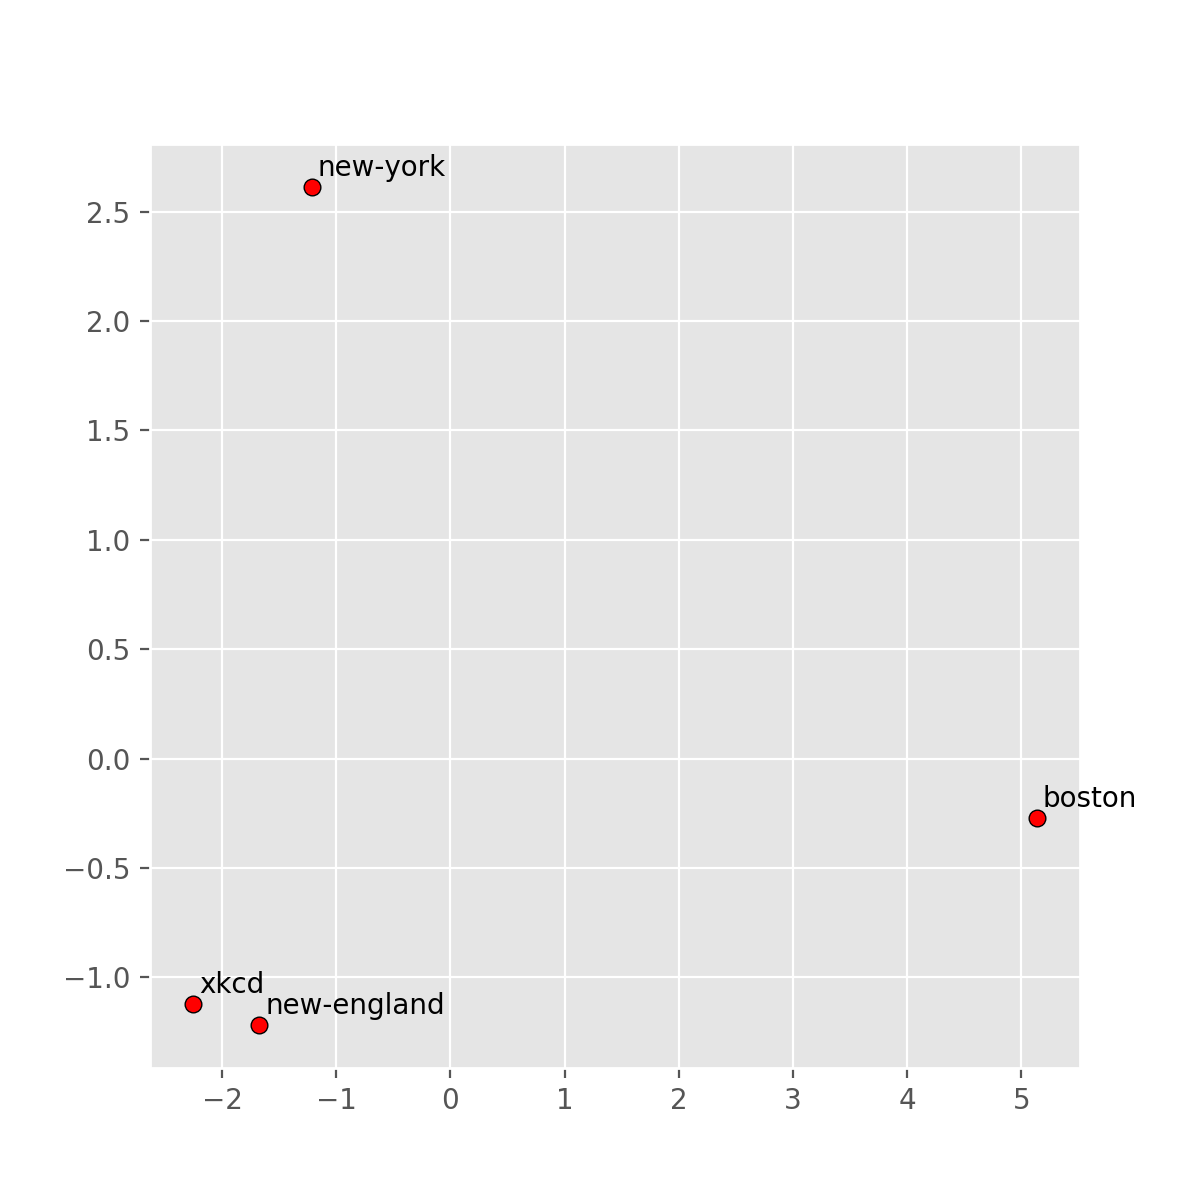

In [49]:
#Scatterplot of Analogy 1
display_pca_scatterplot(model,analogy1_list)

<IPython.core.display.Javascript object>


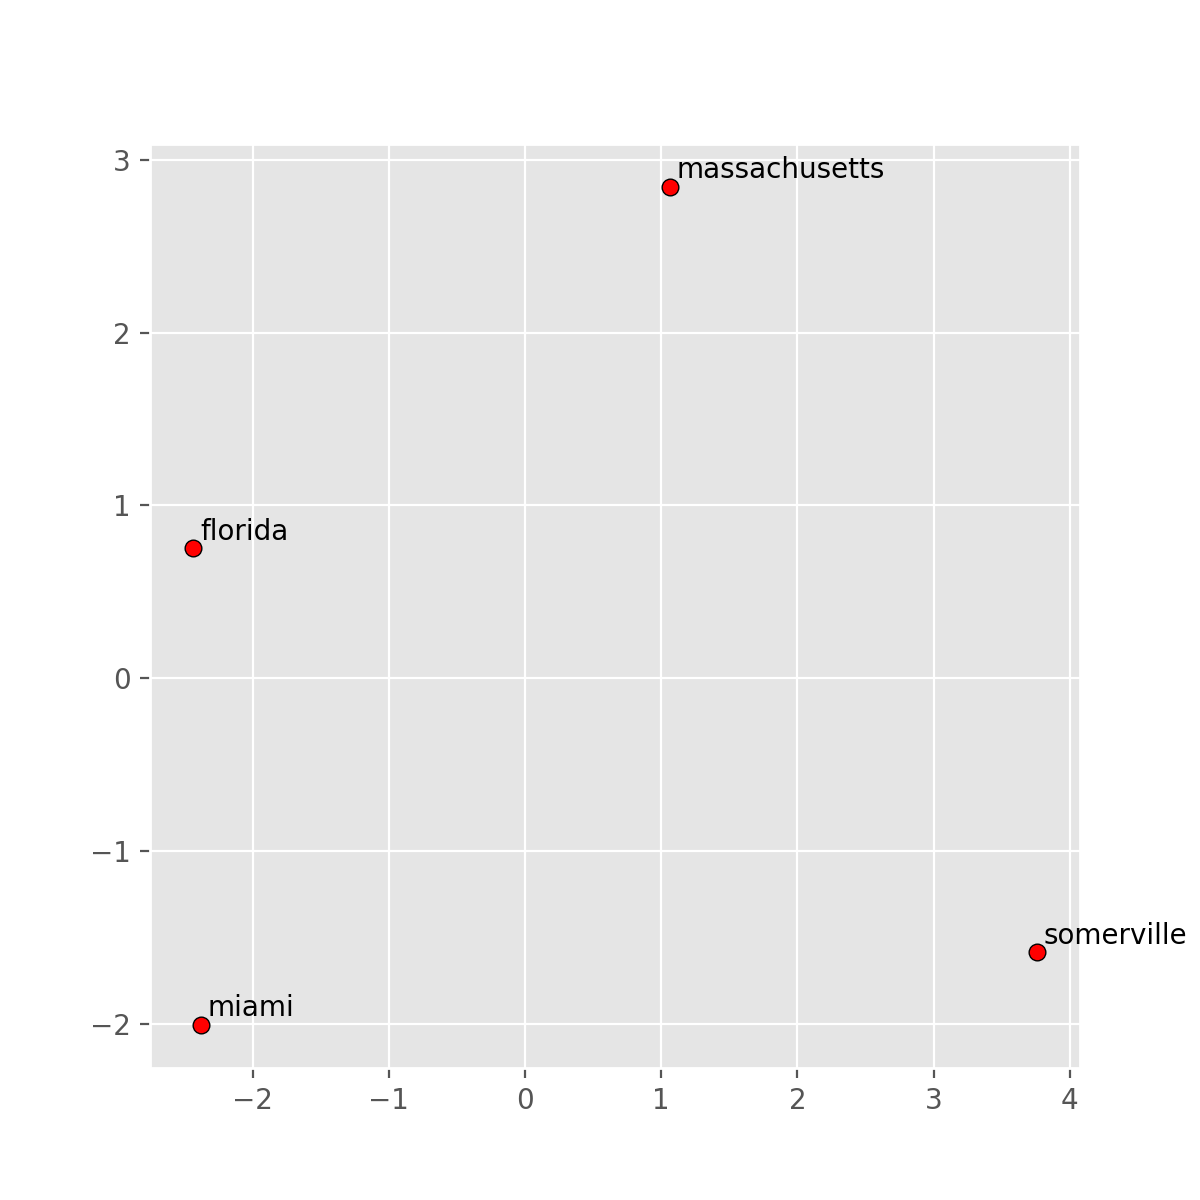

In [50]:
#Scatterplot 2
display_pca_scatterplot(model,analogy2_list)

<IPython.core.display.Javascript object>


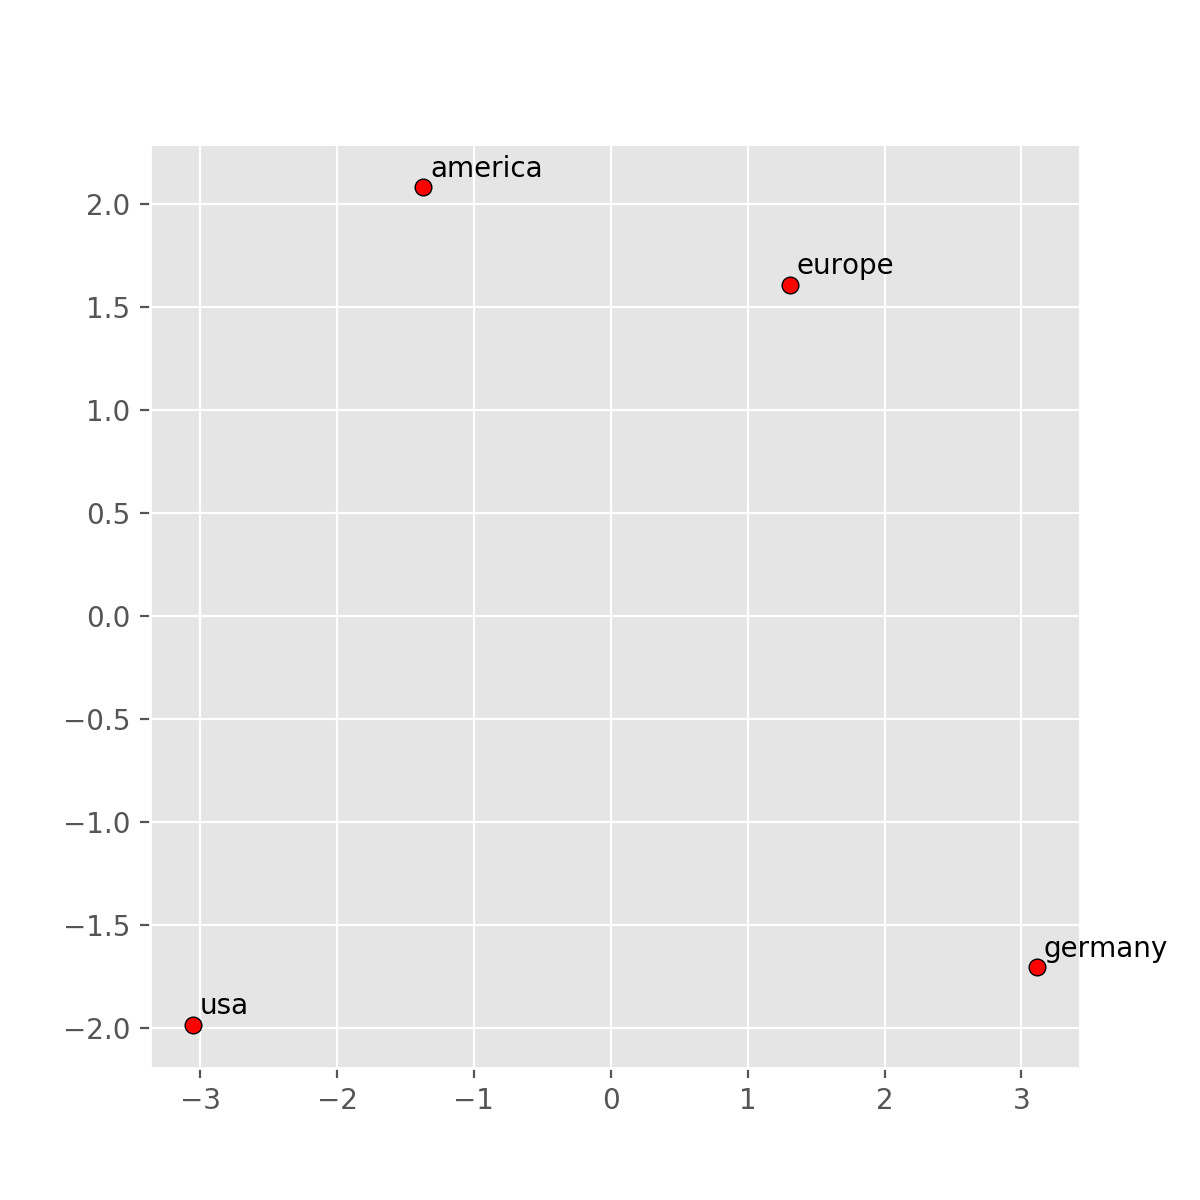

In [51]:
#Scatterplot 3
display_pca_scatterplot(model,analogy3_list)

<IPython.core.display.Javascript object>


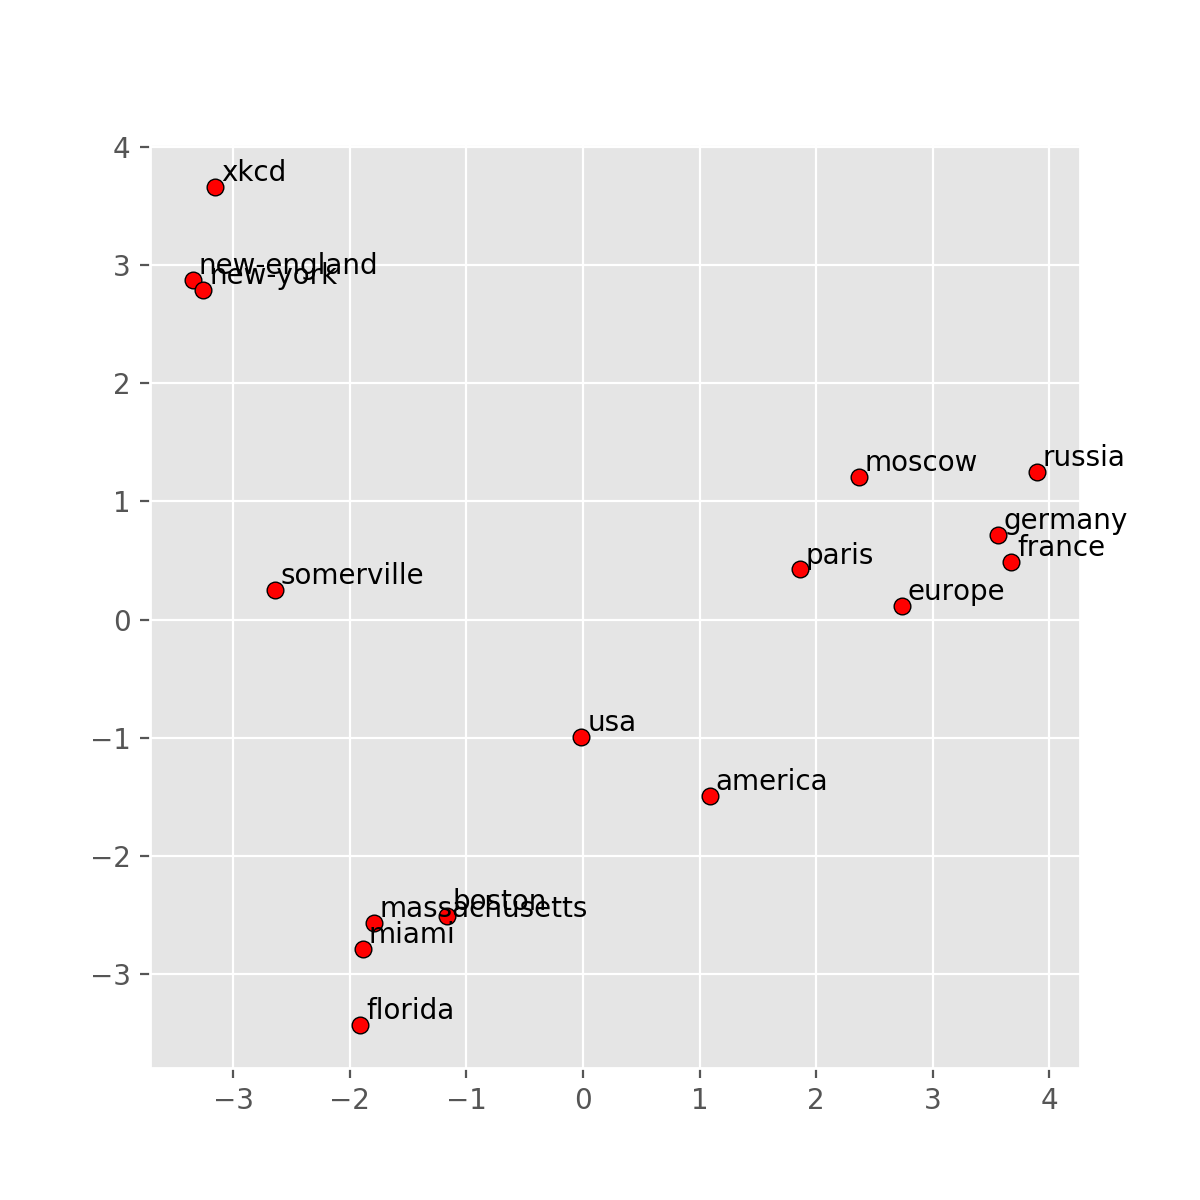

In [52]:
#Joined List on one PCA
display_pca_scatterplot(model,joined_list)

### Problem 2

Repeat the above experiment with 300-dimensional Glove vectors transformed into Word2Vec format. We are curious whether the shape of above geometric shapes are preserved or modified in the higher dimensional space. Use PCA to make the projections. (20%)

In [53]:
#Replace the 100-dimensional Glove with a 300-dimensional Glove
glove_file = datapath('/Users/jlee/Documents/GitHub/Python-Practice/Harvard CSCI E-63/glove/glove.6B.300d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

/Users/jlee/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [54]:
#Create analogies, then find the analogy and then append it to a new list

#Analogy 1: City to Region
analogy1 = analogy('boston','new-england','new-york')
print("Analogy 1: boston is to new england as new york is to",analogy1)
analogy1_list = ['boston','new-england','new-york',analogy1]

#Analogy 2: City to State
analogy2 = analogy('miami','florida','somerville')
print("Analogy 2: miami is to florida as somerville is to", analogy2)
analogy2_list = ['miami','florida','somerville',analogy2]

#Analogy 3: Country to Continent
analogy3 = analogy('germany','europe','usa')
print("Analogy 3: germany is to europe as usa is to",analogy3)
analogy3_list = ['germany','europe','usa',analogy3]

joined_list = analogy1_list + analogy2_list + analogy3_list + original_list 

Analogy 1: boston is to new england as new york is to _____________
Analogy 2: miami is to florida as somerville is to massachusetts
Analogy 3: germany is to europe as usa is to america


<b><i>Problem 2 Observations</b></i><br>
Note: Clarified with the professor duing class that the below is an acceptable approach to the problem to print the output images.

<i>Analogy 1: </i> Boston is to New England as New York is to X, we see that "____________" is chosen with the 300 Dimensional Glove - which may mean that there is no appropriate word or that "____________" can be reasoned out. I would gather that this is another potential inaccuracy of Gensim adding on to the last analogy of XKCD. We no longer see the trapezoid but a triangle form. 

<i>Analogy 2: </i> Miami is to Florida as Somerville is to X, we see that Massachusetts is still chosen with the 300 Dimensional Glove.

<i>Analogy 3: </i> Germany is to Europe as USA is to is to X, we see that America is still chosen with the 300 Dimensional Glove.

<i>Overall: </i> We still see similar clusters form here in the overall graph. In the individual graphs, most shapes that form are still trapezoids with the exception of a new analogy result of Analogy 1.

<IPython.core.display.Javascript object>


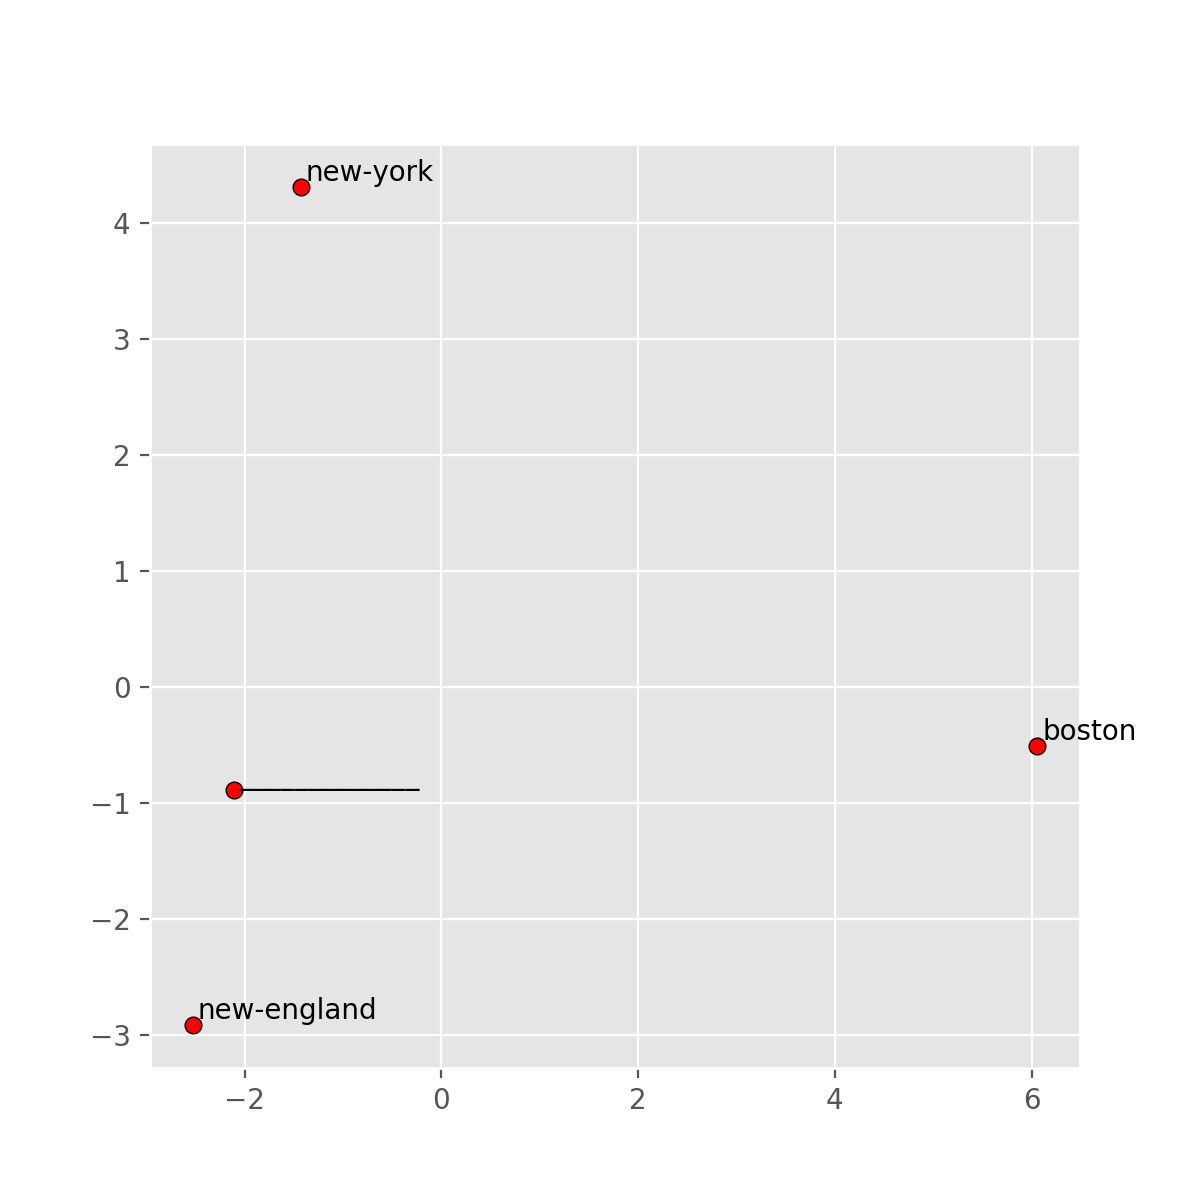

In [55]:
#Scatterplot of Analogy 1
display_pca_scatterplot(model,analogy1_list)

<IPython.core.display.Javascript object>


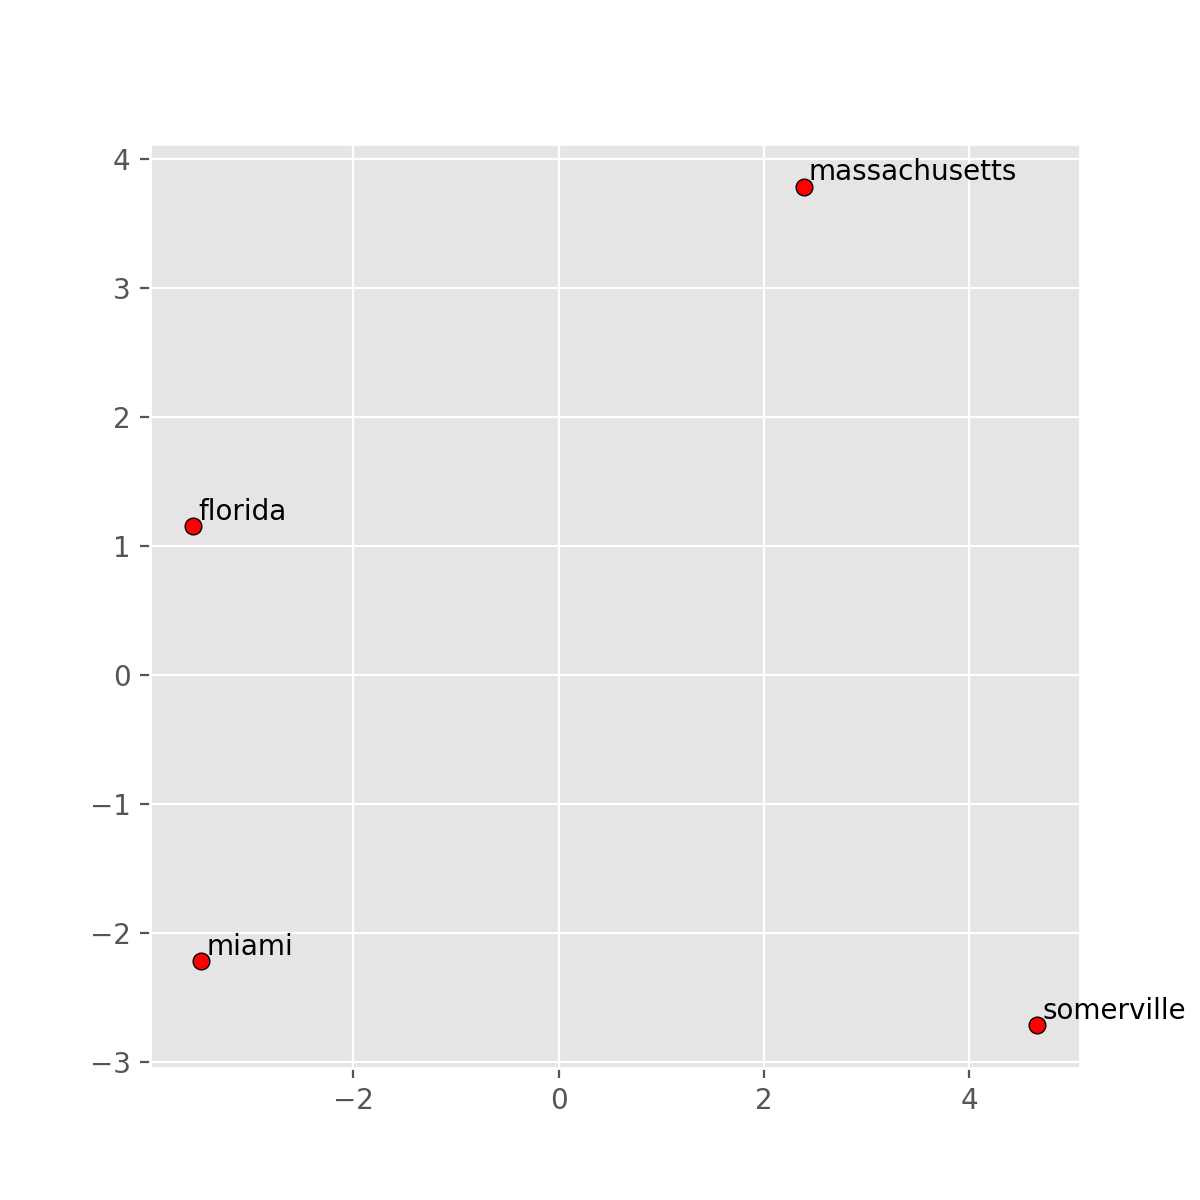

In [56]:
#Scatterplot 2
display_pca_scatterplot(model,analogy2_list)

<IPython.core.display.Javascript object>


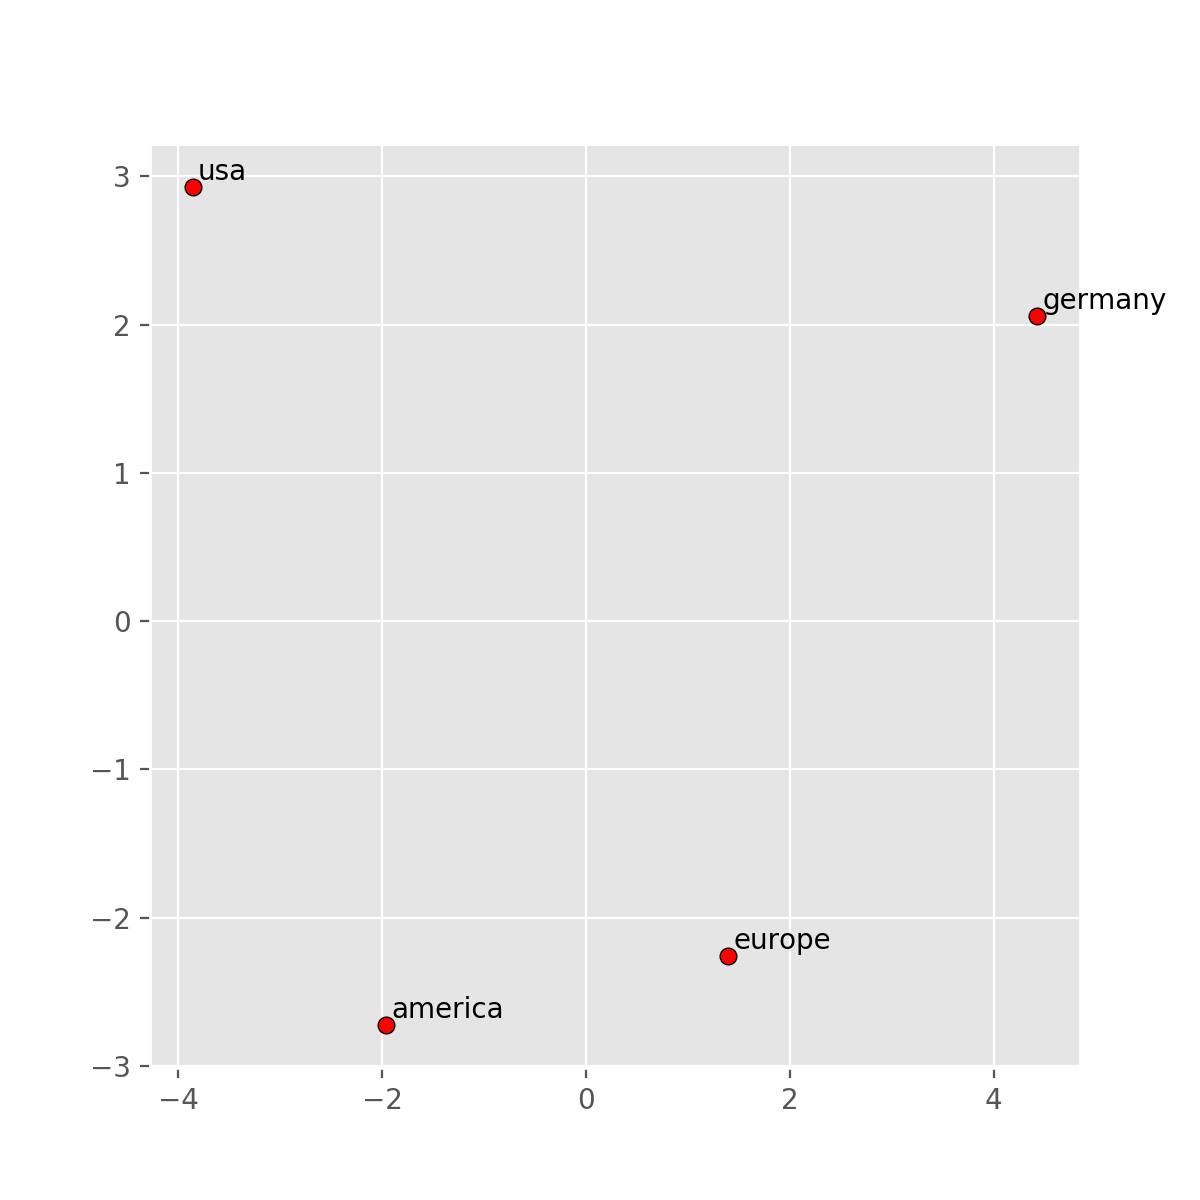

In [57]:
#Scatterplot 3
display_pca_scatterplot(model,analogy3_list)

<IPython.core.display.Javascript object>


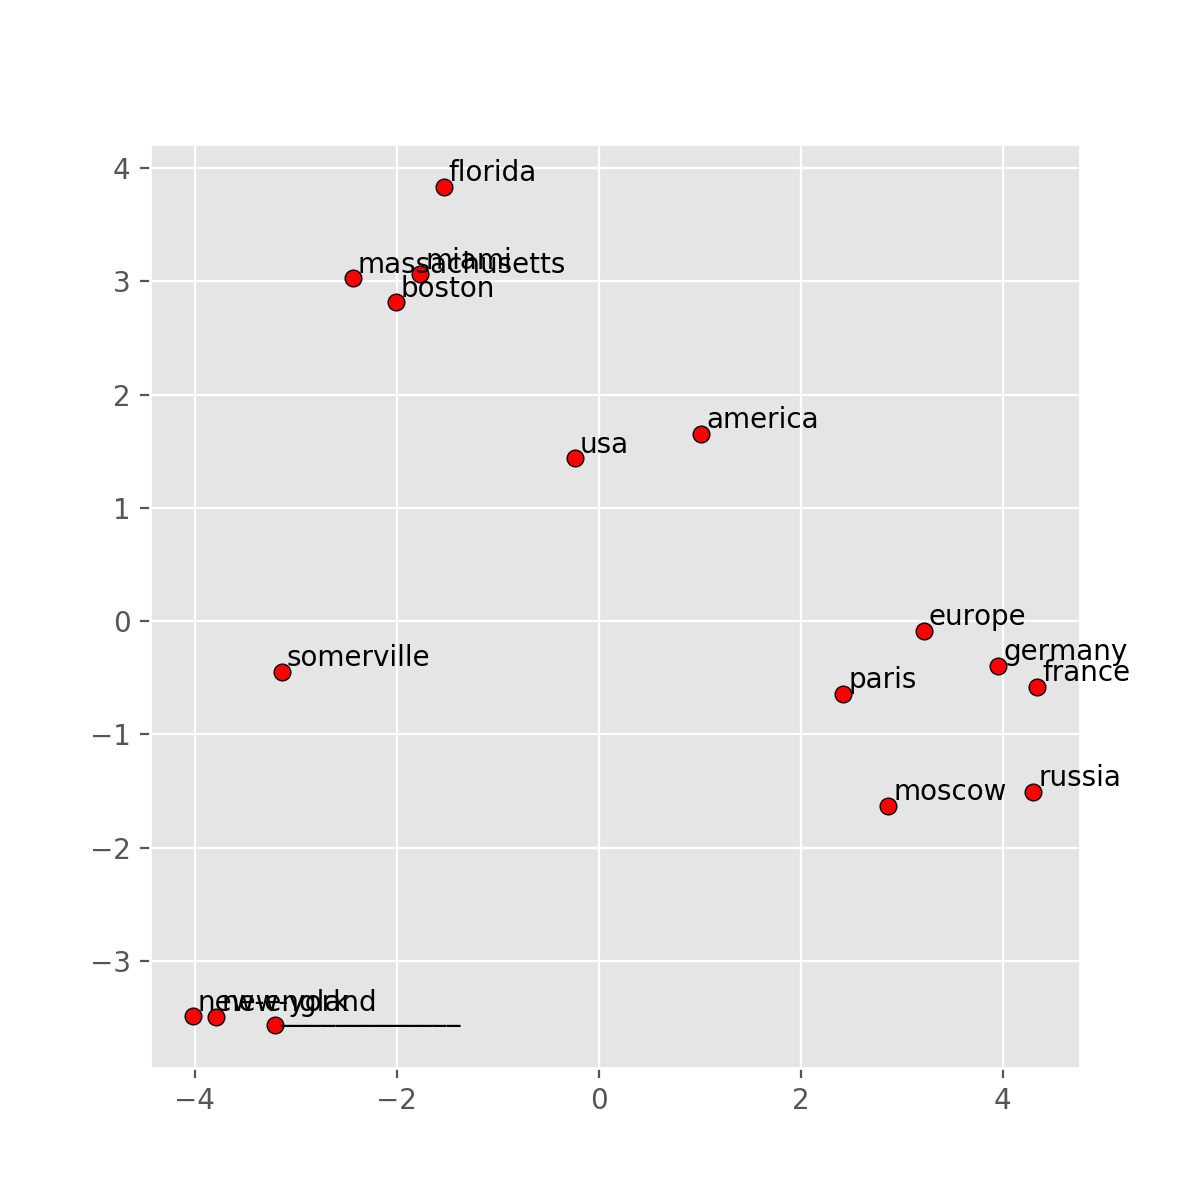

In [58]:
#Joined List on one PCA
display_pca_scatterplot(model,joined_list)

### Problem 3
Repeat the above experiment from problem 1 using Sci-kit Learn T-SNE projections, rather than PCA. (10%)

In [9]:
#Obtained TSNE example from Page 98 of Lecture 3 Slides
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#Create Scatterplots Function
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    word_vectors = np.array([model[w] for w in words])
    tsne = TSNE(
        perplexity=5, n_components=2, init='pca', n_iter=5000, method='exact')
    twodim = tsne.fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<b><i>Problem 3 Observations</b></i><br>

<i>Analogies 1-3: </i> Plotting the 100 Word Vector Glove on TSNE has actually produced far more square shaped results (compared to the trapezoids from the PCA function) for all analogies! The vectors plotted are the same as in Problem 1.

<i>Overall: </i> The clusters appear to be a bit more logically grouped, but the square structures begin to dissapear in comparison when graphing all points on one plane. 

<IPython.core.display.Javascript object>


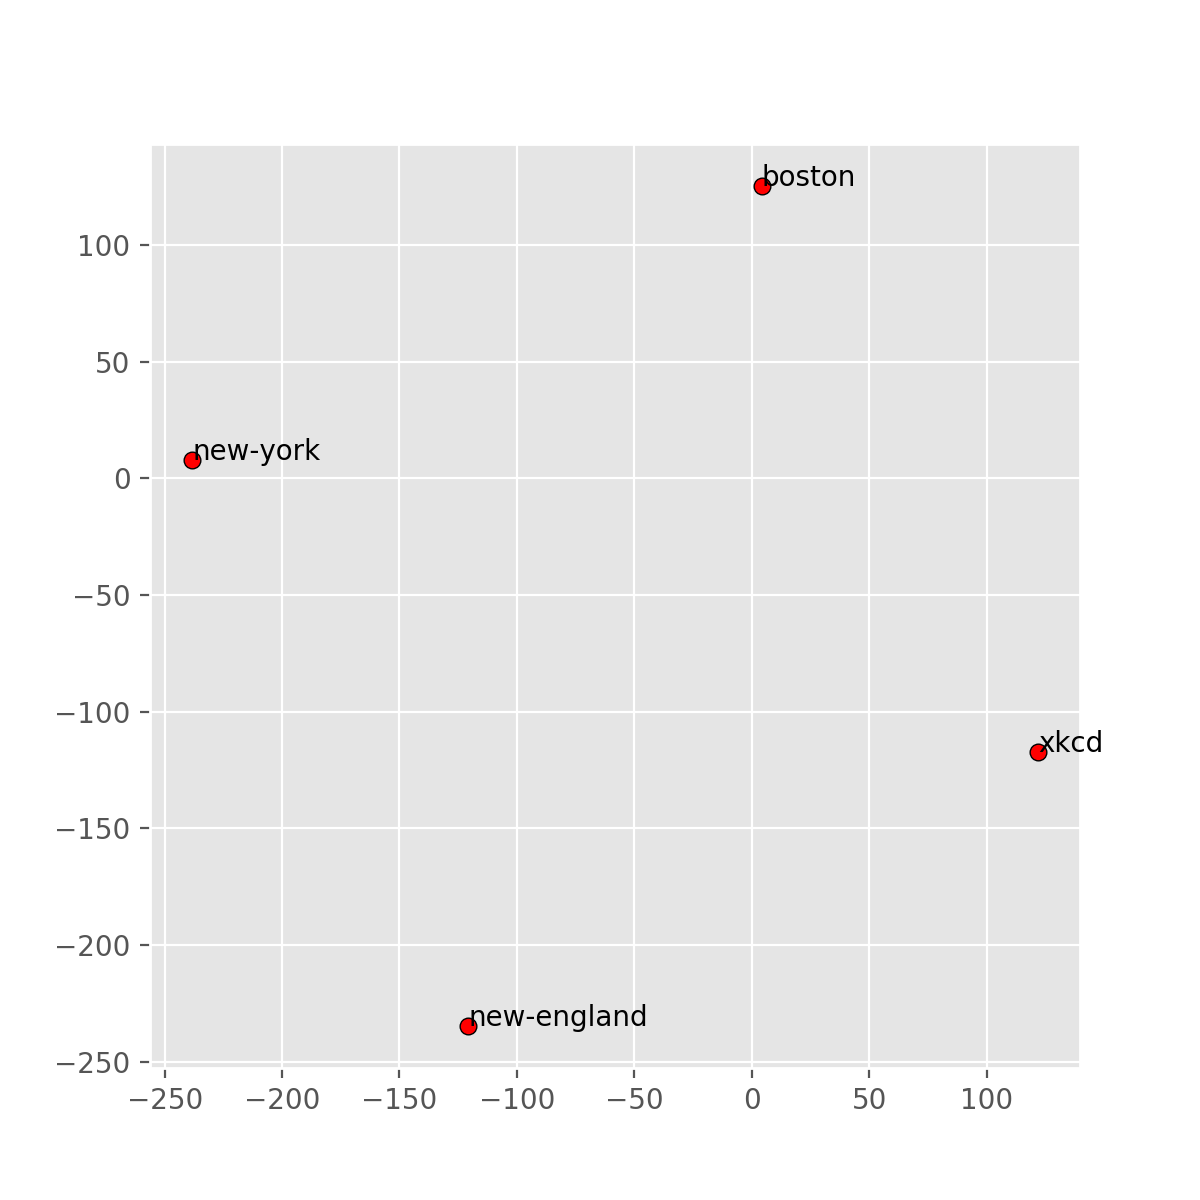

In [12]:
display_pca_scatterplot(model,analogy1_list)

<IPython.core.display.Javascript object>


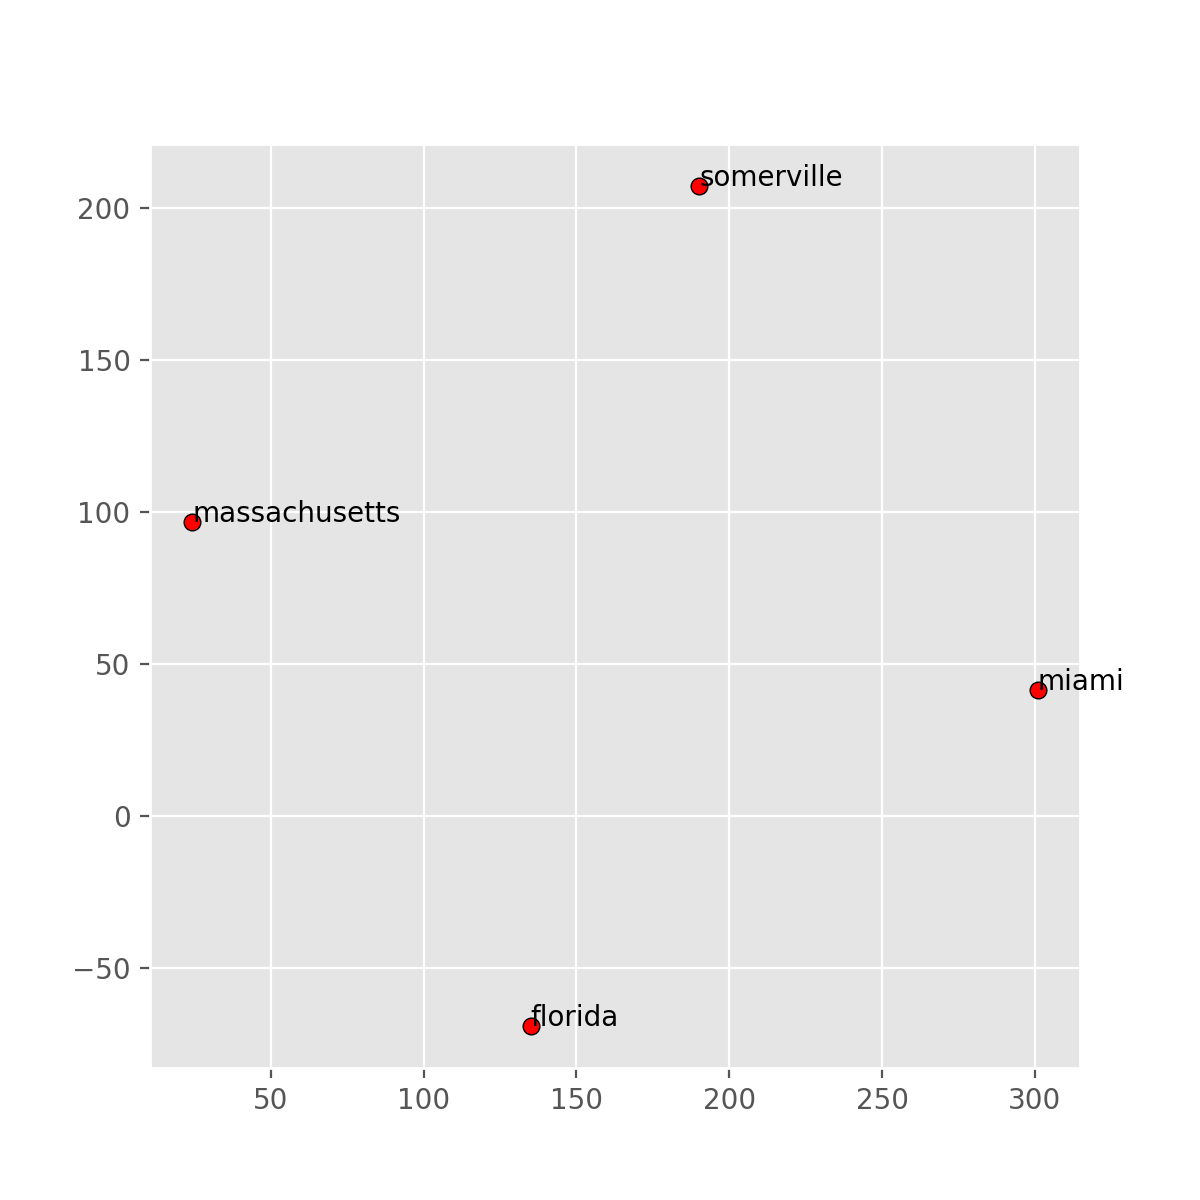

In [13]:
display_pca_scatterplot(model,analogy2_list)

<IPython.core.display.Javascript object>


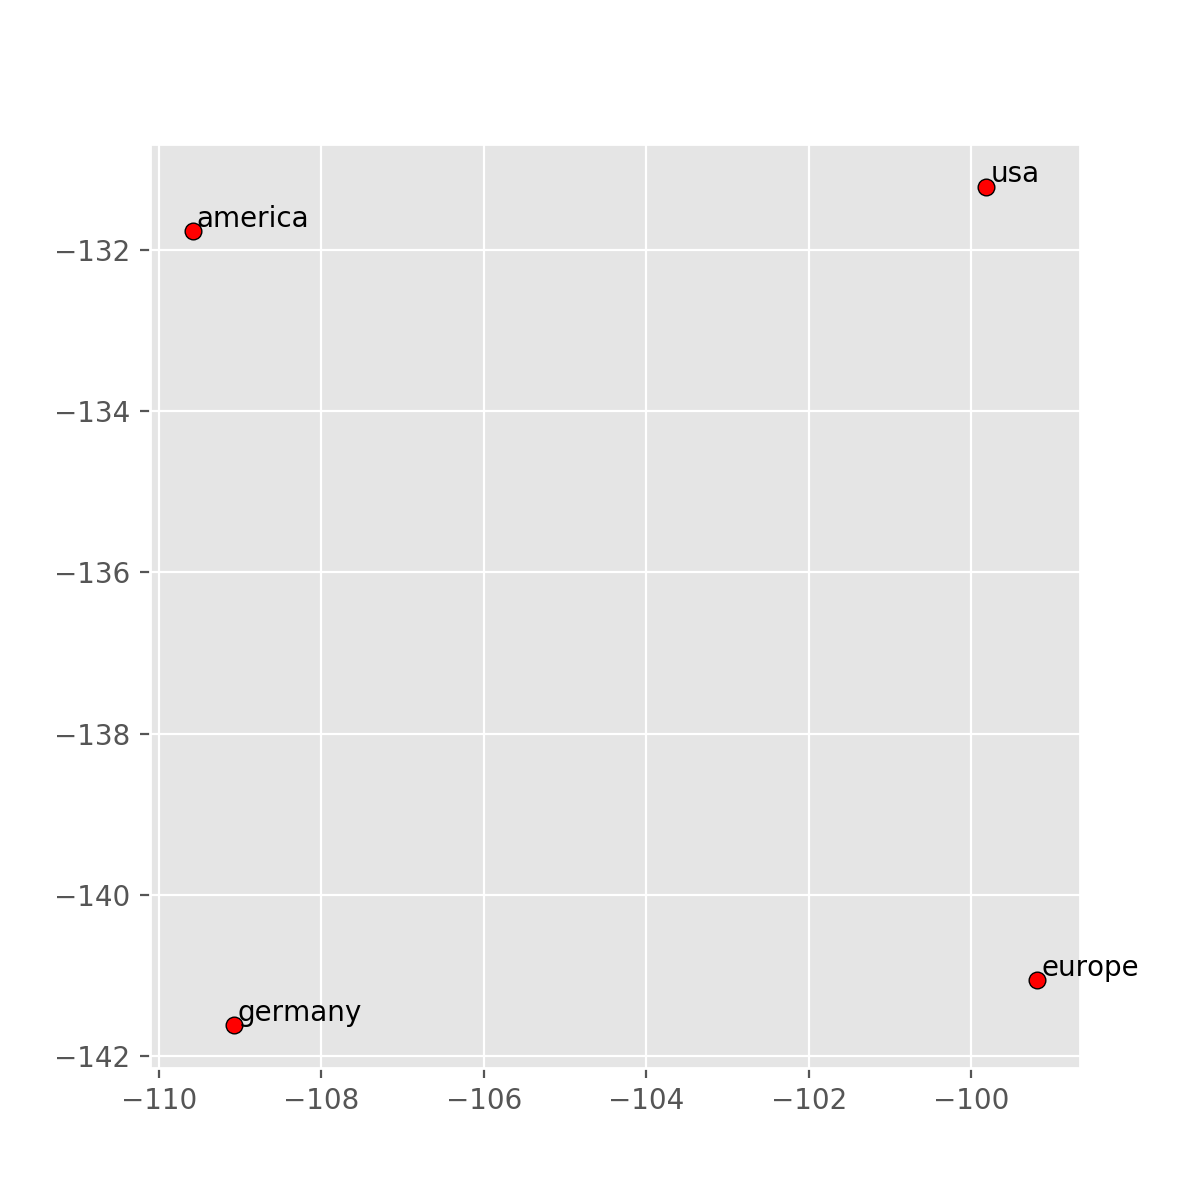

In [14]:
display_pca_scatterplot(model,analogy3_list)

<IPython.core.display.Javascript object>


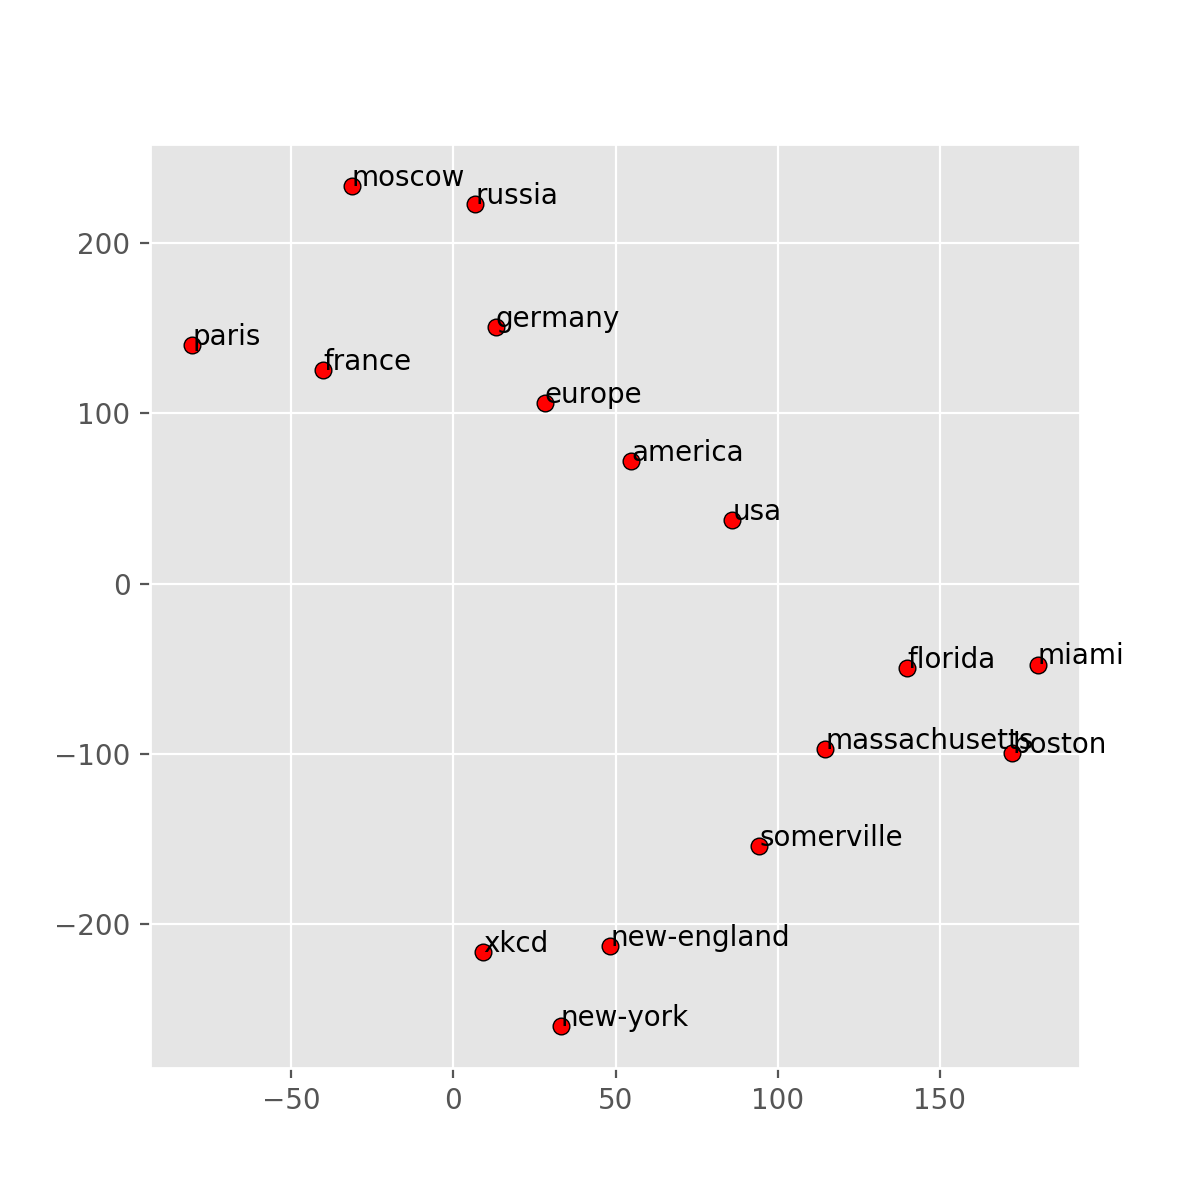

In [15]:
display_pca_scatterplot(model,joined_list)

### Problem 4

Try to use the simplest architecture we discussed in Lecture 4 with two Dense layers to create a de-noising autoencoder. Use the latent space of dimension 64. Report on your findings. (25%)

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 248us/step - loss: 0.3213 - val_loss: 0.2662
Epoch 2/50
60000/60000 [==============================] - 15s 247us/step - loss: 0.2636 - val_loss: 0.2593
Epoch 3/50
60000/60000 [==============================] - 16s 266us/step - loss: 0.2539 - val_loss: 0.2459
Epoch 4/50
60000/60000 [==============================] - 16s 262us/step - loss: 0.2386 - val_loss: 0.2297
Epoch 5/50
60000/60000 [==============================] - 16s 260us/step - loss: 0.2240 - val_loss: 0.2165
Epoch 6/50
60000/60000 [==============================] - 15s 255us/step - loss: 0.2122 - val_loss: 0.2058
Epoch 7/50
60000/60000 [==============================] - 14s 239us/step - loss: 0.2027 - val_loss: 0.1974
Epoch 8/50
60000/60000 [==============================] - 15s 249us/step - loss: 0.1950 - val_loss: 0.1905
Epoch 9/50
60000/60000 [==============================] - 15s 251us/

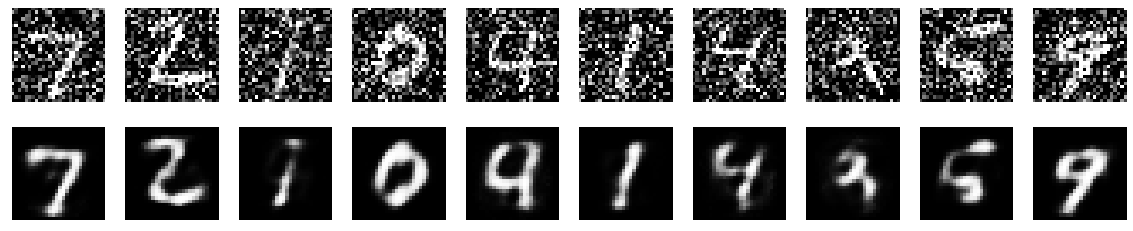

In [18]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 64  # 64 floats -> compression of factor 12.25, assuming the input is 784 floats

# "encoded" is the encoded representation of the input
# "decoded" is the lossy reconstruction of the input
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

#Create a "noisy data set"
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal (loc=0.0, scale=1.0, size= x_train.shape )
x_test_noisy = x_test + noise_factor * np.random.normal (loc=0.0, scale=1.0, size= x_test.shape )
x_train_noisy = np.clip( x_train_noisy , 0., 1.)
x_test_noisy = np.clip( x_test_noisy , 0., 1.)
print (x_train.shape)
print (x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<b><i>Problem 4 Observations</b></i>

Creating an denoising autoencoder with the examples provided in lecture, you can see the original sample data at the top we create a test image and introduction variation of noise to it. After going through even a simple two layer Neural Network (NN) with a Compression Factor of 12.25, we can see that the noise is significantly reduced in the output to the point where the text is mostly readable. Although the output images are still far less detailed compared to the original, shown below. 

Also, shown by the graph of loss per epoch below, we can see the amount of the losses per epoch significantly decrease as the two layer NN continues to learn. 

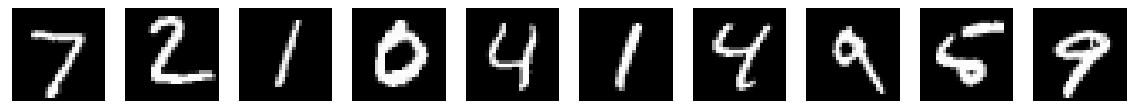

In [32]:
%matplotlib inline
n = 10
plt.figure(figsize =(20,2))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

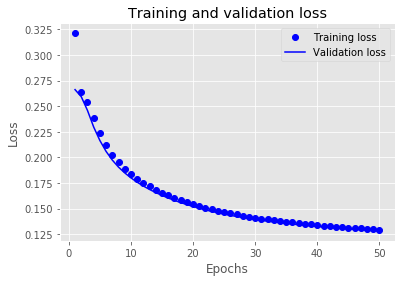

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Problem 5
Consider image denoising auto decoder described on slide 54 of the notes for Lecture 4. Make an experiment by reducing the number of filters (channels) contained in all Conv2D layers from 32 to 16. Compare results of autoencoders with 32 and 16 channels visually. Could you come up with a technique to compare the quality of denoising more accurately. In either case present the effect of removing noise from handwritten digits 3, 6, and 8 (25%)

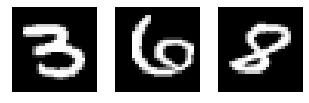

In [101]:
import numpy as np

#Filter to only 3, 6 or 8 by taking in the labels
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
train_filter = np.isin(Y_train, [3, 6, 8])
test_filter = np.isin(Y_test, [3, 6, 8])
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

#Print the original image
%matplotlib inline
n = 3
plt.figure(figsize =(20,2))

for i in range(8,8 + n):
    ax = plt.subplot(1, 8 + n, i + 1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [94]:
print (X_train.shape)
print (X_test.shape)

(17900, 28, 28)
(2942, 28, 28)


In [102]:
#Code obtained from Slide 54-56 in Lecture 4
import matplotlib.pyplot as plt

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal (loc=0.0, scale=1.0, size= X_train.shape )
X_test_noisy = X_test + noise_factor * np.random.normal (loc=0.0, scale=1.0, size= X_test.shape )
X_train_noisy = np.clip( X_train_noisy , 0., 1.)
X_test_noisy = np.clip( X_test_noisy , 0., 1.)

#Create the model 
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 16)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img , decoded)
autoencoder.compile(optimizer = 'adadelta', loss='binary_crossentropy')

In [129]:
#Train the model
from keras.callbacks import TensorBoard

#Using 20 Epochs due to time
autoencoder.fit(X_train_noisy, X_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[TensorBoard(log_dir='autoencoder')])

#Decode the image
decoded_imgs = autoencoder.predict(X_test_noisy)

Train on 17900 samples, validate on 2942 samples
Epoch 1/20
17900/17900 [==============================] - 43s 2ms/step - loss: 0.1320 - val_loss: 0.1299
Epoch 2/20
17900/17900 [==============================] - 41s 2ms/step - loss: 0.1297 - val_loss: 0.1288
Epoch 3/20
17900/17900 [==============================] - 39s 2ms/step - loss: 0.1278 - val_loss: 0.1259
Epoch 4/20
17900/17900 [==============================] - 40s 2ms/step - loss: 0.1265 - val_loss: 0.1285
Epoch 5/20
17900/17900 [==============================] - 42s 2ms/step - loss: 0.1251 - val_loss: 0.1242
Epoch 6/20
17900/17900 [==============================] - 42s 2ms/step - loss: 0.1239 - val_loss: 0.1244
Epoch 7/20
17900/17900 [==============================] - 41s 2ms/step - loss: 0.1232 - val_loss: 0.1226
Epoch 8/20
17900/17900 [==============================] - 38s 2ms/step - loss: 0.1218 - val_loss: 0.1250
Epoch 9/20
17900/17900 [==============================] - 39s 2ms/step - loss: 0.1212 - val_loss: 0.1216
Epoch 

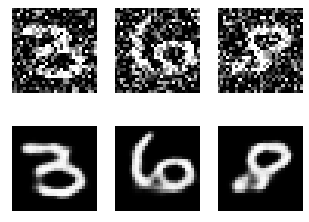

In [130]:
%matplotlib inline
n = 3 # how many digits we will display
plt.figure(figsize =(20, 4))
for i in range(8,8+n):
    # display original noisy images
    ax = plt.subplot (2, 8+n, i - 7)
    plt.imshow(X_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot (2, 8+n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [131]:
#Re-create the model (Increase filters to 32)
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img , decoded)
autoencoder.compile(optimizer = 'adadelta', loss='binary_crossentropy')

In [132]:
#Train the model
from keras.callbacks import TensorBoard

#Using 20 Epochs due to time
autoencoder.fit(X_train_noisy, X_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[TensorBoard(log_dir='autoencoder')])

#Decode the image
decoded_imgs_2 = autoencoder.predict(X_test_noisy)

Train on 17900 samples, validate on 2942 samples
Epoch 1/20
17900/17900 [==============================] - 81s 5ms/step - loss: 0.3013 - val_loss: 0.2128
Epoch 2/20
17900/17900 [==============================] - 71s 4ms/step - loss: 0.1694 - val_loss: 0.1546
Epoch 3/20
17900/17900 [==============================] - 73s 4ms/step - loss: 0.1489 - val_loss: 0.1413
Epoch 4/20
17900/17900 [==============================] - 68s 4ms/step - loss: 0.1395 - val_loss: 0.1369
Epoch 5/20
17900/17900 [==============================] - 68s 4ms/step - loss: 0.1331 - val_loss: 0.1316
Epoch 6/20
17900/17900 [==============================] - 74s 4ms/step - loss: 0.1296 - val_loss: 0.1284
Epoch 7/20
17900/17900 [==============================] - 73s 4ms/step - loss: 0.1263 - val_loss: 0.1224
Epoch 8/20
17900/17900 [==============================] - 72s 4ms/step - loss: 0.1239 - val_loss: 0.1204
Epoch 9/20
17900/17900 [==============================] - 69s 4ms/step - loss: 0.1221 - val_loss: 0.1201
Epoch 

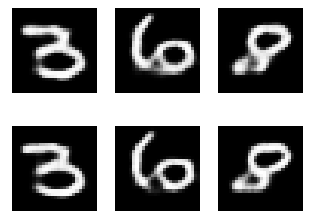

In [154]:
%matplotlib inline
n = 3 # how many digits we will display
plt.figure(figsize =(20, 4))
for i in range(8,8+n):
    # display 16 channel reconstruction
    ax = plt.subplot (2, 8+n, i - 7)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display the 32 channel reconstruction
    ax = plt.subplot (2, 8+n, i + 1 + n)
    plt.imshow(decoded_imgs_2[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

<b><i>Problem 5 Observation</b></i>

As seen by the result above, the noisy image of 3, 6 and 8 has become more detailed after applying the 16 channel CNN in 20 Epochs but not as clear as the original image (such as the bottom of the 8 that is cut off). Although, from observation, this technique seems more capable of denoising an image compared to the earlier two layer NN. When applying the 32 channel CNN the results clear up even more, although not significantly - the loss comparison is fairly similar between the 16 and 32 channel.

In terms of designing a better denoising process, my results above are limited based on run time of the channels and epochs. Perhaps by adding more channels and running more epocs on AWS or GCP (which would presumably be faster), the results would start to resemble the original handwritten image. 